## Predictions of loan defaults and risks for lending club

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV,cross_val_predict
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectFromModel,SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import cross_validation, feature_selection, pipeline,preprocessing, linear_model, grid_search
from sklearn import decomposition
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import warnings

C:\Users\Ananya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Ananya\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset=pd.read_csv('C:/Users/Ananya/Downloads/LendingClub2012to2013.csv')

C:\Users\Ananya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,10129506,11981122.0,20800.0,20800.0,20800.0,36 months,13.53%,706.16,B,B5,...,0.0,3.0,90.2,50.0,0.0,0.0,43100.0,23473.0,15000.0,0.0
1,10159498,1319523.0,12000.0,12000.0,12000.0,36 months,6.62%,368.45,A,A2,...,0.0,2.0,95.5,0.0,0.0,0.0,333044.0,42603.0,52600.0,42769.0
2,10129454,11981072.0,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2,...,0.0,4.0,100.0,0.0,0.0,0.0,29700.0,7137.0,18100.0,0.0
3,10139658,11991209.0,12000.0,12000.0,12000.0,36 months,13.53%,407.40,B,B5,...,0.0,2.0,81.2,33.3,0.0,0.0,18130.0,13605.0,7000.0,10030.0
4,10127816,11979581.0,24000.0,24000.0,24000.0,36 months,13.53%,814.80,B,B5,...,0.0,2.0,100.0,75.0,0.0,0.0,229072.0,61397.0,21500.0,58847.0


In [5]:
data_dictionary=pd.read_csv('C:/Users/Ananya/Downloads/LendingClubDataDictionary.csv')
data_dictionary=data_dictionary.rename(columns={'LoanStatNew':'name','Description':'Description'})
data_dictionary=data_dictionary[['name','Description']]
data_dictionary.head()

,name,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [6]:
dataset_dtypes=pd.DataFrame(dataset.dtypes,columns=['dtypes'])
dataset_dtypes=dataset_dtypes.reset_index()
dataset_dtypes.rename(columns={'index':'name'},inplace=True)


dataset_dtypes['first value']=dataset.loc[0].values
dataset_dtypes['percentage of missing values']=(dataset.isnull().mean()*100).values

preview=dataset_dtypes.merge(data_dictionary,on='name',how='left')

###### Analyzing the first 20 variables

In [7]:
preview[:20]

,name,dtypes,first value,percentage of missing values,Description
0,id,object,10129506,0.000000,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.19811e+07,0.001063,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,20800,0.001063,The listed amount of the loan applied for by t...
3,funded_amnt,float64,20800,0.001063,The total amount committed to that loan at tha...
4,funded_amnt_inv,float64,20800,0.001063,The total amount committed by investors for th...
5,term,object,36 months,0.001063,The number of payments on the loan. Values are...
6,int_rate,object,13.53%,0.001063,Interest Rate on the loan
7,installment,float64,706.16,0.001063,The monthly payment owed by the borrower if th...
8,grade,object,B,0.001063,LC assigned loan grade
9,sub_grade,object,B5,0.001063,LC assigned loan subgrade


###### After analyzing the columns, we can conclude to drop following variables

'id' : randomly generated unique identification number

'member_id': randomly generated unique number for identification purpose

'sub_grade': contains the same information as grade

'pymnt_plan': contains only one value for all data.


##### Removing the text features
'emp_title': job title provided in text

'url': url list of website

'desc': comments.

###### Removing Target Leakage(features which occurs in future and can leak in pst data)
'funded_amnt': It starts after the loan is approved. So leaks from future

'funded_amnt_inv': Similar to above. Leaks from future.

'issue_d': leaks from future.

In [8]:
drop_list=['id','member_id','sub_grade','emp_title','funded_amnt','url','issue_d','funded_amnt_inv','desc','pymnt_plan']
dataset=dataset.drop(drop_list,axis=1)

##### Analyzing the next 20 columns

In [9]:
preview[20:40]

,name,dtypes,first value,percentage of missing values,Description
20,purpose,object,debt_consolidation,0.001063,A category provided by the borrower for the lo...
21,title,object,Reducing Debt to Purchase Home,0.004783,The loan title provided by the borrower
22,zip_code,object,100xx,0.001063,The first 3 numbers of the zip code provided b...
23,addr_state,object,NY,0.001063,The state provided by the borrower in the loan...
24,dti,float64,16.73,0.001063,A ratio calculated using the borrower’s total ...
25,delinq_2yrs,float64,0,0.001063,The number of 30+ days past-due incidences of ...
26,earliest_cr_line,object,6/1/1998,0.001063,The month the borrower's earliest reported cre...
27,fico_range_low,float64,685,0.001063,The lower boundary range the borrower’s FICO a...
28,fico_range_high,float64,689,0.001063,The upper boundary range the borrower’s FICO a...
29,inq_last_6mths,float64,2,0.001063,The number of inquiries in past 6 months (excl...


##### Removing text features:
'title': subject of the loan

##### Removing variables
'zip_code': only first three letters provided which cannot help in analyzing.

'mths_since_lst_delinq':58% of data is missing.

'mths_since_last_record':91% of missing data

'out_prncp' : leaks from future

'out_prncp_inv' : leaks from future

'earliest_cr_line' : leaks from future

In [10]:
drop_cols=['zip_code','mths_since_last_delinq','mths_since_last_record','out_prncp','out_prncp_inv','title','earliest_cr_line']
dataset.drop(drop_cols,axis=1,inplace=True)

#### Analyzing next 20 columns

In [11]:
preview[40:60]

,name,dtypes,first value,percentage of missing values,Description
40,total_pymnt,float64,23926.6,0.001063,Payments received to date for total amount funded
41,total_pymnt_inv,float64,23926.6,0.001063,Payments received to date for portion of total...
42,total_rec_prncp,float64,20800,0.001063,Principal received to date
43,total_rec_int,float64,3126.64,0.001063,Interest received to date
44,total_rec_late_fee,float64,0,0.001063,Late fees received to date
45,recoveries,float64,0,0.001063,post charge off gross recovery
46,collection_recovery_fee,float64,0,0.001063,post charge off collection fee
47,last_pymnt_d,object,5/15/2017,0.080772,Last month payment was received
48,last_pymnt_amnt,float64,13334.9,0.001063,Last total payment amount received
49,next_pymnt_d,object,NaN,91.111843,Next scheduled payment date


##### Analyzing variables. Listing variables which needs to be removed
'total_pymnt' : leaks from future

'total_pymnt_inv' : leaks from future

'total_rec_prncp' : leaks from future

'total_rec_int' : leaks from future

'total_rec_late_fee' : leaks from future

'recoveries' : leaks from future

'collection_recovery_fee' : leaks from future

'last_pymnt_d' : leaks from future

'last_pymnt_amnt' :leaks from future

'next_pymnt_d' : 91 % data is missing

'last_credit_pull_d' : leaks from future

'last_fico_range_high' : leaks from future

'last_fico_range_low' : leaks from future

'mths_since_last_major_derog' : 83 % of data missing

'application_type' : all values are same.

'annual_inc_joint' : No values present

'policy_code' : Same value in records. Zero variance

'annual_inc_joint' : 100 % missing values

'dt_joint': 100% misssing values

'verification_status_joint':100% missing values

In [12]:
drop_cols_name=['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
               'last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','last_fico_range_high','last_fico_range_low','last_fico_range_low',
               'mths_since_last_major_derog','application_type','annual_inc_joint','policy_code','annual_inc_joint','dti_joint','verification_status_joint']
dataset.drop(drop_cols_name,axis=1,inplace=True)

#### Analyzing next 20 columns

In [13]:
preview[60:80]

,name,dtypes,first value,percentage of missing values,Description
60,acc_now_delinq,float64,0,0.001063,The number of accounts on which the borrower i...
61,tot_coll_amt,float64,0,14.742564,Total collection amounts ever owed
62,tot_cur_bal,float64,23473,14.742564,Total current balance of all accounts
63,open_acc_6m,float64,NaN,100.000000,Number of open trades in last 6 months
64,open_il_6m,float64,NaN,100.000000,Number of currently active installment trades
65,open_il_12m,float64,NaN,100.000000,Number of installment accounts opened in past ...
66,open_il_24m,float64,NaN,100.000000,Number of installment accounts opened in past ...
67,mths_since_rcnt_il,float64,NaN,100.000000,Months since most recent installment accounts ...
68,total_bal_il,float64,NaN,100.000000,Total current balance of all installment accounts
69,il_util,float64,NaN,100.000000,Ratio of total current balance to high credit/...


##### Analyzing variables. Removing all variables which has more than 50 % missing values
'open_acc_6m'

'open_il_6m'

'open_il_12m'

'open_il_24m'

'mths_since_rcnt_il'

'total_bal_il'

'il_util'

'open_rv_12m'

'open_rv_24m'

'max_bal_bc'

'all_util'

'inq_fi'

'total_cu_tl'

'inq_last_12m'

In [14]:
drop_cols_2=['open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m',
             'open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m']
dataset.drop(drop_cols_2,axis=1,inplace=True)

In [15]:
preview[80:]

,name,dtypes,first value,percentage of missing values,Description
80,bc_open_to_buy,float64,6811,4.796926,Total open to buy on revolving bankcards.
81,bc_util,float64,54.6,4.843158,Ratio of total current balance to high credit/...
82,chargeoff_within_12_mths,float64,0,0.001063,Number of charge-offs within 12 months
83,delinq_amnt,float64,0,0.001063,The past-due amount owed for the accounts on w...
84,mo_sin_old_il_acct,float64,115,18.000563,Months since oldest bank installment account o...
85,mo_sin_old_rev_tl_op,float64,186,14.743096,Months since oldest revolving account opened
86,mo_sin_rcnt_rev_tl_op,float64,0,14.743096,Months since most recent revolving account opened
87,mo_sin_rcnt_tl,float64,0,14.742564,Months since most recent account opened
88,mort_acc,float64,0,3.983888,Number of mortgage accounts.
89,mths_since_recent_bc,float64,0,4.692241,Months since most recent bankcard account opened.


##### Analyzing variables. Removing following variables:
'num_accts_ever_120_pd	' : Target Leakage

'num_tl_30dpd': Target Leakage

'mths_since_recent_bc_dlq' 80 % missing values

'mths_since_recent_revol_delinq':70 % missing values

'num_tl_120dpd_2m' : Target Leakage

'num_tl_30dpd' : Target Leakage

'num_tl_op_past_12m' : Target Leakage

In [16]:
drop_cols_3=['num_accts_ever_120_pd','num_tl_30dpd','mths_since_recent_bc_dlq','mths_since_recent_revol_delinq','num_tl_120dpd_2m','num_tl_30dpd','num_tl_op_past_12m']
dataset.drop(drop_cols_3,axis=1,inplace=True)

In [17]:
dataset.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
      

#### Cleaning features

In [18]:
dataset['int_rate'] = pd.to_numeric(dataset['int_rate'].str.strip('%'), errors='coerce')
dataset['revol_util'] = pd.to_numeric(dataset['revol_util'].str.strip('%'), errors='coerce')
dataset['emp_length']=dataset['emp_length'].str.replace('+',"").str.replace('years',"").str.replace("year","").str.replace('<',"").str.replace('>',"").str.replace('n/a','').replace("",np.nan)

In [19]:
#dataset['earliest_cr_line'] = pd.to_datetime(dataset['earliest_cr_line'], format='%b-%Y')
#dataset['time_since_earliest_cr_line'] = dataset['earliest_cr_line'].apply(lambda x: pd.to_datetime('20000101', format='%Y%m%d') - x).dt.days

In [20]:
dataset.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
      

In [21]:
contiuous_variables= list(set(['loan_amnt','int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs','fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc','collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq','percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens','tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit']))
categorical_variables=list(set(['term','grade','home_ownership','verification_status','purpose','addr_state','initial_list_status']))

In [22]:
dataset.replace('',np.nan)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_sats,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,20800.0,36 months,13.53,706.16,B,10,RENT,81500.00,Verified,Fully Paid,...,29.0,0.0,90.2,50.0,0.0,0.0,43100.0,23473.0,15000.0,0.0
1,12000.0,36 months,6.62,368.45,A,10,MORTGAGE,105000.00,Not Verified,Current,...,12.0,0.0,95.5,0.0,0.0,0.0,333044.0,42603.0,52600.0,42769.0
2,12000.0,36 months,10.99,392.81,B,4,RENT,60000.00,Not Verified,Fully Paid,...,15.0,0.0,100.0,0.0,0.0,0.0,29700.0,7137.0,18100.0,0.0
3,12000.0,36 months,13.53,407.40,B,10,RENT,40000.00,Source Verified,Fully Paid,...,7.0,0.0,81.2,33.3,0.0,0.0,18130.0,13605.0,7000.0,10030.0
4,24000.0,36 months,13.53,814.80,B,10,MORTGAGE,100000.00,Verified,Fully Paid,...,14.0,0.0,100.0,75.0,0.0,0.0,229072.0,61397.0,21500.0,58847.0
5,11500.0,60 months,22.90,323.54,E,4,RENT,32760.00,Verified,Current,...,12.0,0.0,100.0,50.0,0.0,0.0,30891.0,24724.0,9000.0,16791.0
6,28000.0,36 months,7.62,872.52,A,5,MORTGAGE,325000.00,Source Verified,Fully Paid,...,15.0,0.0,100.0,16.7,0.0,0.0,850886.0,199739.0,42200.0,196686.0
7,12000.0,36 months,11.99,398.52,B,10,MORTGAGE,130000.00,Source Verified,Current,...,9.0,0.0,100.0,1.0,0.0,0.0,365874.0,44327.0,10700.0,57674.0
8,10000.0,36 months,9.67,321.13,B,7,MORTGAGE,102000.00,Not Verified,Current,...,9.0,0.0,77.3,66.7,0.0,0.0,58486.0,39143.0,9200.0,36186.0
9,3000.0,36 months,12.85,100.87,B,10,RENT,25000.00,Verified,Fully Paid,...,5.0,0.0,91.3,66.7,2.0,0.0,32082.0,19530.0,4300.0,26782.0


In [23]:
dataset.dropna(axis=0,inplace=True)

##### Imputing missing values

In [24]:
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer.fit(dataset[contiuous_variables])
dataset[contiuous_variables]=imputer.transform(dataset[contiuous_variables])

In [25]:
dataset[categorical_variables].replace('',np.nan)

,grade,initial_list_status,term,addr_state,verification_status,purpose,home_ownership
0,B,f,36 months,NY,Verified,debt_consolidation,RENT
1,A,w,36 months,CT,Not Verified,debt_consolidation,MORTGAGE
3,B,w,36 months,NM,Source Verified,debt_consolidation,RENT
4,B,w,36 months,MI,Verified,credit_card,MORTGAGE
5,E,f,60 months,CA,Verified,debt_consolidation,RENT
6,A,w,36 months,CA,Source Verified,debt_consolidation,MORTGAGE
7,B,f,36 months,CO,Source Verified,debt_consolidation,MORTGAGE
8,B,f,36 months,MA,Not Verified,debt_consolidation,MORTGAGE
9,B,f,36 months,FL,Verified,debt_consolidation,RENT
10,B,w,36 months,MI,Verified,debt_consolidation,OWN


#### Removing missing data in categorical variables

In [26]:
dataset.dropna(axis=0,inplace=True)

In [27]:
dataset[categorical_variables]

,grade,initial_list_status,term,addr_state,verification_status,purpose,home_ownership
0,B,f,36 months,NY,Verified,debt_consolidation,RENT
1,A,w,36 months,CT,Not Verified,debt_consolidation,MORTGAGE
3,B,w,36 months,NM,Source Verified,debt_consolidation,RENT
4,B,w,36 months,MI,Verified,credit_card,MORTGAGE
5,E,f,60 months,CA,Verified,debt_consolidation,RENT
6,A,w,36 months,CA,Source Verified,debt_consolidation,MORTGAGE
7,B,f,36 months,CO,Source Verified,debt_consolidation,MORTGAGE
8,B,f,36 months,MA,Not Verified,debt_consolidation,MORTGAGE
9,B,f,36 months,FL,Verified,debt_consolidation,RENT
10,B,w,36 months,MI,Verified,debt_consolidation,OWN


purpose
car                    1033
credit_card           30252
debt_consolidation    79769
home_improvement       7181
house                   676
major_purchase         2256
medical                 945
moving                  629
other                  5537
renewable_energy         66
small_business         1507
vacation                546
wedding                 697
Name: loan_status, dtype: int64


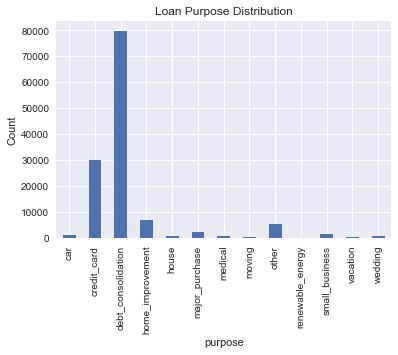

In [28]:
var = dataset.groupby('purpose').loan_status.count() 
print(var)
# Exploratory Analysis for loan_status Loan purpose
plt.title('Loan Purpose Distribution')
plt.xlabel('Purpose')
plt.ylabel('Count')
var.plot(kind='bar')
plt.show()

grade
A    17427
B    42764
C    36586
D    20121
E     8939
F     4384
G      873
Name: loan_status, dtype: int64


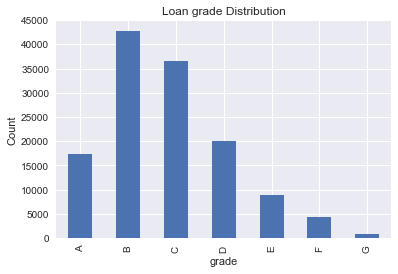

In [29]:
var = dataset.groupby('grade').loan_status.count() 
print(var)
# Exploratory Analysis for loan_status Loan purpose
plt.title('Loan grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
var.plot(kind='bar')
plt.show()

home_ownership
MORTGAGE    72727
NONE           29
OTHER          36
OWN          9965
RENT        48337
Name: loan_status, dtype: int64


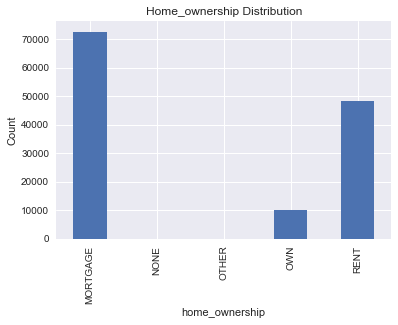

In [30]:
var = dataset.groupby('home_ownership').loan_status.count() 
print(var)
# Exploratory Analysis for loan_status Loan purpose
plt.title('Home_ownership Distribution')
plt.xlabel('Ownership')
plt.ylabel('Count')
var.plot(kind='bar')
plt.show()

verification_status
Not Verified       40115
Source Verified    28658
Verified           62321
Name: loan_status, dtype: int64


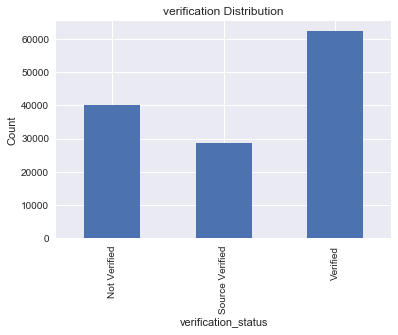

In [31]:
var = dataset.groupby('verification_status').loan_status.count() 
print(var)
# Exploratory Analysis for loan_status Loan purpose
plt.title('verification Distribution')
plt.xlabel('verification status')
plt.ylabel('Count')
var.plot(kind='bar')
plt.show()

term
 36 months    97533
 60 months    33561
Name: loan_status, dtype: int64


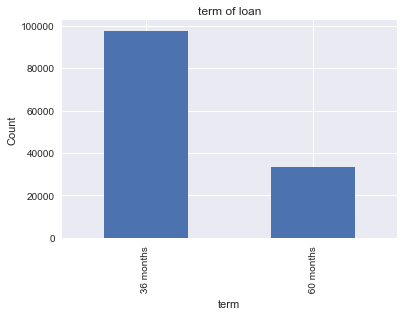

In [32]:
var = dataset.groupby('term').loan_status.count() 
print(var)
# Exploratory Analysis for loan_status Loan purpose
plt.title('term of loan')
plt.xlabel('term')
plt.ylabel('Count')
var.plot(kind='bar')
plt.show()

initial_list_status
f    98388
w    32706
Name: loan_status, dtype: int64


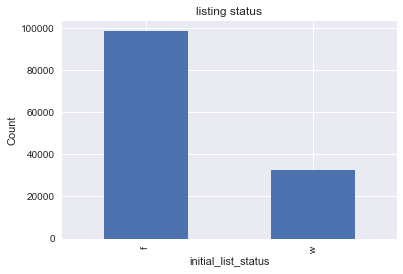

In [33]:
var = dataset.groupby('initial_list_status').loan_status.count() 
print(var)
# Exploratory Analysis for loan_status Loan purpose
plt.title('listing status')
plt.xlabel('initial_list_status')
plt.ylabel('Count')
var.plot(kind='bar')
plt.show()

addr_state
AK      402
AL     1690
AR     1030
AZ     3034
CA    20400
CO     2421
CT     2060
DC      348
DE      340
FL     8554
GA     4095
HI      764
ID        1
IL     5447
IN     2029
KS     1331
KY     1278
LA     1582
MA     3076
MD     3053
MI     3325
MN     2295
MO     2210
MS        2
MT      403
NC     3756
NE        2
NH      674
NJ     5085
NM      719
NV     1947
NY    10025
OH     4335
OK     1266
OR     1692
PA     4563
RI      562
SC     1481
SD      293
TN     1701
TX    10625
UT     1083
VA     3989
VT      203
WA     3176
WI     1740
WV      671
WY      336
Name: loan_status, dtype: int64


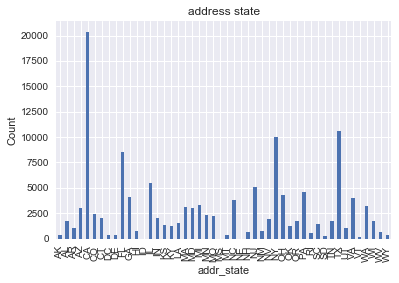

In [34]:
var = dataset.groupby('addr_state').loan_status.count() 
print(var)
# Exploratory Analysis for loan_status Loan purpose
plt.title('address state')
plt.xlabel('state')
plt.ylabel('Count')
var.plot(kind='bar')
plt.show()

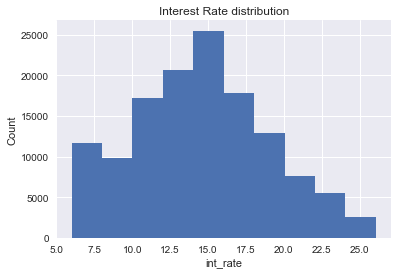

In [35]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
# Exploratory Analysis for interest rate variable
ax.hist(dataset['int_rate'],bins = 10)
plt.title('Interest Rate distribution')
plt.xlabel('int_rate')
plt.ylabel('Count')
plt.show()

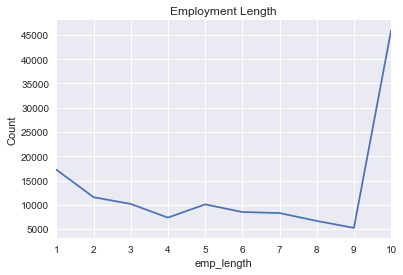

In [36]:
var = dataset.groupby('emp_length').loan_status.count() 
# Exploratory Analysis for Employment length variable
plt.title('Employment Length')
plt.xlabel('emp_length')
plt.ylabel('Count')
var.plot(kind='line')
plt.show()

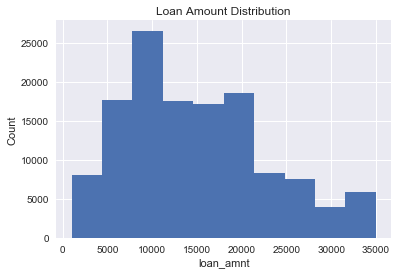

In [37]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
# Exploratory Analysis for loan amount Distribution
ax.hist(dataset['loan_amnt'],bins = 10)
plt.title('Loan Amount Distribution')
plt.xlabel('loan_amnt')
plt.ylabel('Count')
plt.show()

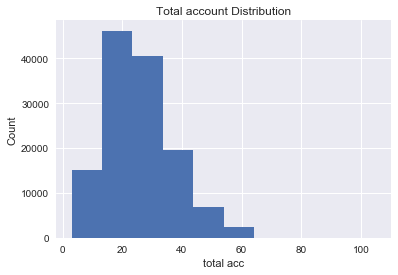

In [38]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
# Exploratory Analysis for loan amount Distribution
ax.hist(dataset['total_acc'],bins = 10)
plt.title('Total account Distribution')
plt.xlabel('total acc')
plt.ylabel('Count')
plt.show()

#### Exploring dependent variable loan status

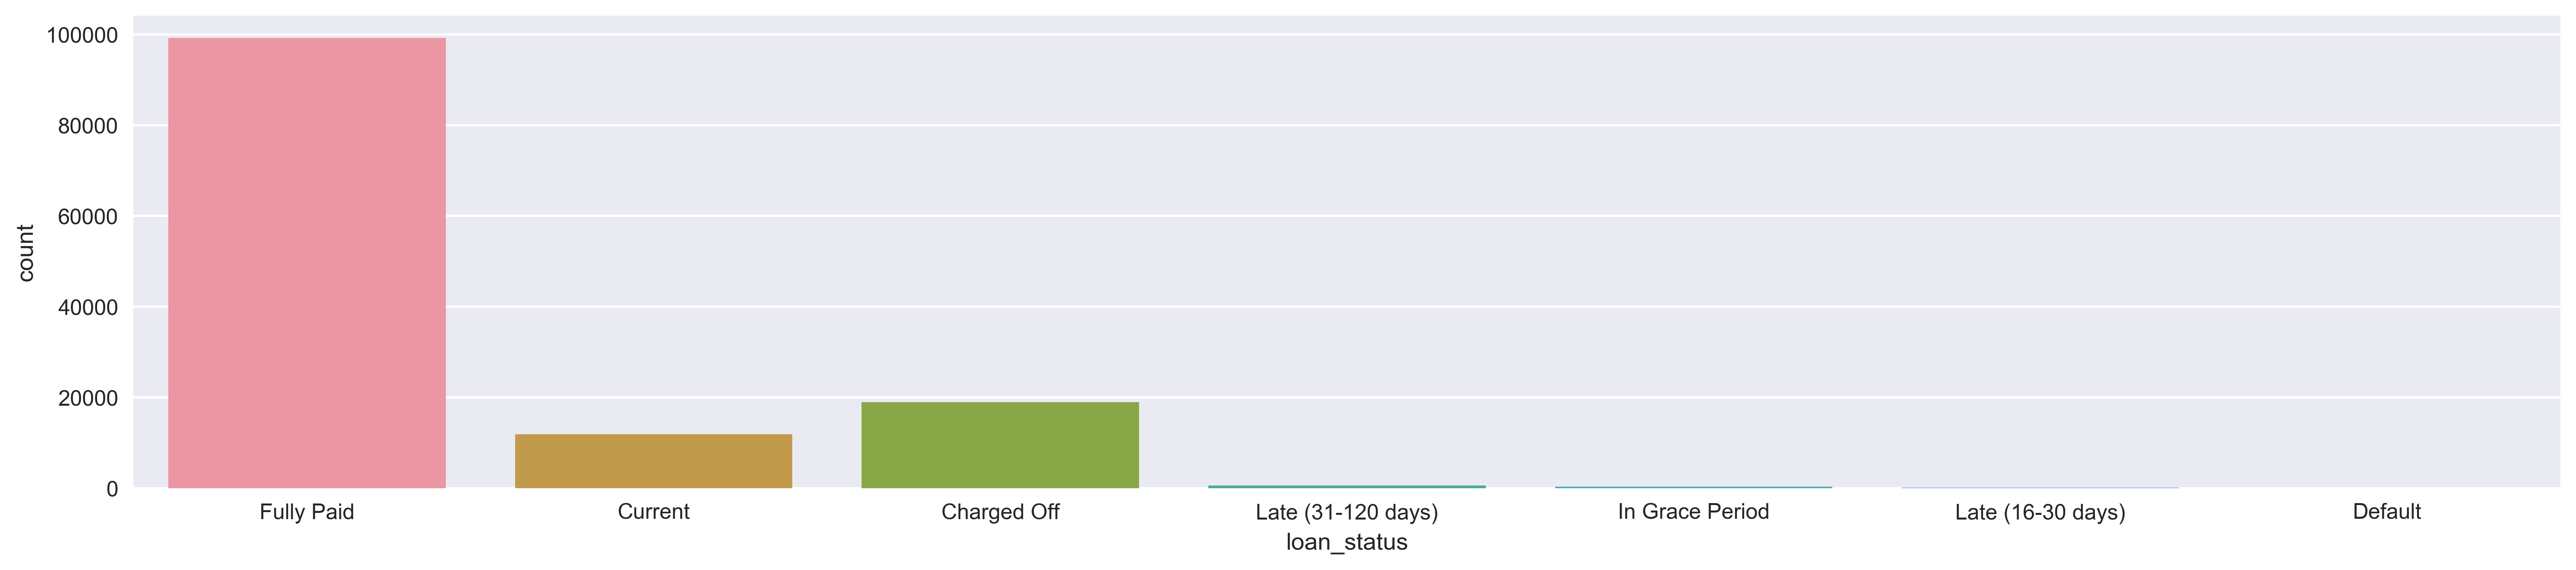

In [39]:
plt.figure(figsize=(20,4), dpi=400)
sns.countplot(x="loan_status", data=dataset)

In [40]:
def transform_loan_status(x):
    #Function To Transofrm loan status to binary classification problem
    status = 0
    if x in ['Fully Paid','In Grace Period']:
        #Current status does not provide any useful information
        status = 0
        return status # Indicating Acceptable status
    elif x in ['Late (16-30 days)','Default','Late (31-120 days)','Charged Off']:
        status = 1
        return status
    return np.nan

In [41]:
dataset['loan_status']=dataset['loan_status'].apply(lambda x: transform_loan_status(x))

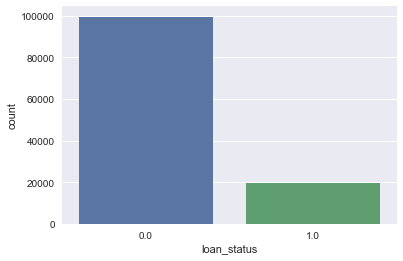

In [42]:
sns.countplot(x='loan_status',data = dataset)

In [43]:
dataset=pd.get_dummies(dataset,columns=categorical_variables)

In [44]:
dataset.dropna(axis=0,inplace=True)

In [45]:
dataset['loan_status']

0         0.0
3         0.0
4         0.0
6         0.0
9         0.0
10        0.0
12        0.0
16        0.0
18        1.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
29        0.0
32        0.0
33        1.0
38        0.0
40        0.0
41        0.0
43        0.0
44        0.0
45        1.0
48        0.0
58        0.0
62        0.0
         ... 
160561    1.0
160563    0.0
160564    0.0
160565    1.0
160566    0.0
160567    0.0
160568    1.0
160569    1.0
160570    0.0
160573    0.0
160574    0.0
160575    0.0
160576    0.0
160579    0.0
160581    0.0
160583    0.0
160585    0.0
160586    0.0
160587    0.0
160589    0.0
160590    0.0
160591    0.0
160592    0.0
160593    0.0
160595    1.0
160597    0.0
160598    0.0
160600    0.0
160601    1.0
160603    0.0
Name: loan_status, dtype: float64

In [46]:
dataset.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'loan_status', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high',
       ...
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT'],
      dtype='object', length=132)

##### Splitting the dataset

In [47]:
X=dataset.drop('loan_status',axis=1)
y=dataset['loan_status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=24)

In [48]:
list(X.columns)

['loan_amnt',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_90g_dpd_24m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 

In [49]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Naive Bayes Classifier

In [53]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [60]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [62]:
cm

array([[11170, 13817],
       [ 1370,  3452]])

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.89      0.45      0.60     24987
        1.0       0.20      0.72      0.31      4822

avg / total       0.78      0.49      0.55     29809



## Cross Validation_Naive Bayes

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
scores = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,scoring='f1')
print("F1 score: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,scoring='precision')
print("Precision score: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,scoring='recall')
print("Recall score: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,scoring='accuracy')
print("Accuracy: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,scoring='roc_auc')
print("AUC: {0:.3f}".format(scores.mean()))

F1 score: 0.318
Precision score: 0.205
Recall score: 0.710
Accuracy: 0.493
AUC: 0.628


#### Cross Validation_Naive Bayes With Grid Search

In [50]:
from sklearn.naive_bayes import GaussianNB
nbg = GaussianNB()

# set up cv
from sklearn import model_selection
cv = model_selection.KFold(10)

# pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler()),('model', nbg) ])

# Parameters for tuning the model
from sklearn.model_selection import GridSearchCV
optimized_nbg = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid=dict()
                            , scoring = 'roc_auc'
                            , verbose = 1
                            , n_jobs = -1)

#Fitting the model with Grid Search
optimized_nbg.fit(X_train, y_train)

#Get the best estimator from the grid Search
print(" The optimized_nbg.best_score is : ", optimized_nbg.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.4s finished


 The optimized_nbg.best_score is :  0.670319134819


## Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

#### Training Decision Tree with Cross Validation

In [51]:
scores = cross_val_score(estimator=classifier_tree,X=X_train,y=y_train,cv=10,scoring='precision')
print("Precision score: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=classifier_tree,X=X_train,y=y_train,cv=10,scoring='f1')
print("F1 score: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=classifier_tree,X=X_train,y=y_train,cv=10,scoring='recall')
print("Recall score: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=classifier_tree,X=X_train,y=y_train,cv=10,scoring='accuracy')
print("Accuracy: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=classifier_tree,X=X_train,y=y_train,cv=10,scoring='roc_auc')
print("AUC: {0:.3f}".format(scores.mean()))

Precision score: 0.240
F1 score: 0.245
Recall score: 0.251
Accuracy: 0.743
AUC: 0.546


#### Testing Decision tree classifier on Test Data(holdout)

In [53]:
y_pred=classifier_tree.predict(X_test)

# Making Final confusion matrix for Decision Tree on hold out
from sklearn.metrics import confusion_matrix
cm_tree=confusion_matrix(y_test,y_pred)
cm_tree

array([[21053,  3934],
       [ 3572,  1250]])

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.85      0.84      0.85     24987
        1.0       0.24      0.26      0.25      4822

avg / total       0.76      0.75      0.75     29809



### SVM classifier

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=24)
classifier.fit(X_train,y_train)

In [ ]:
scores = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,scoring='precision')
print("Precision score: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,scoring='f1')
print("F1 score: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,scoring='recall')
print("Recall score: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,scoring='accuracy')
print("Accuracy: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,scoring='roc_auc')
print("AUC: {0:.3f}".format(scores.mean()))

In [51]:
############### Support Vector Machines Linaer Classifier #####################
from sklearn.svm import LinearSVC
clf = LinearSVC()

# set up cv
from sklearn import model_selection
cv = model_selection.KFold(10)

# pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler()),('model', clf) ])


# Parameters for tuning the model
class_weight = ['balanced']
loss = [ 'hinge', 'squared_hinge']
max_iter = [1000,1250,1400]
from sklearn.model_selection import GridSearchCV
optimized_clf = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid=dict
                              (model__class_weight = class_weight,
                               model__loss = loss,
                               model__max_iter = max_iter)
                            , scoring = 'roc_auc'
                            , verbose = 1
                            , n_jobs = -1)

#Fitting the model with Grid Search
optimized_clf.fit(X_train, y_train)

#Get the best estimator from the grid Search
print("testing",optimized_clf.best_estimator_)
print(" The optimized_clf.best_score is : ", optimized_clf.best_score_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 34.8min finished


testing Pipeline(steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1400,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
 The optimized_clf.best_score is :  0.71597667191


#### Testing SVM on Test data

In [ ]:
predictions = classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

## Logistic Regression

In [64]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
predictions = logmodel.predict(X_test)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.84      0.99      0.91     24987
        1.0       0.48      0.05      0.09      4822

avg / total       0.79      0.84      0.78     29809



### Logistic Regression_CrossValidation

In [65]:
scores = cross_val_score(estimator=logmodel,X=X_train,y=y_train,cv=10,scoring='precision')
print("Precision score: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=logmodel,X=X_train,y=y_train,cv=10,scoring='f1')
print("F1 score: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=logmodel,X=X_train,y=y_train,cv=10,scoring='recall')
print("Recall score: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=logmodel,X=X_train,y=y_train,cv=10,scoring='accuracy')
print("Accuracy: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=logmodel,X=X_train,y=y_train,cv=10,scoring='roc_auc')
print("AUC: {0:.3f}".format(scores.mean()))

Precision score: 0.454
F1 score: 0.015
Recall score: 0.007
Accuracy: 0.833
AUC: 0.677


### KNN classifier

In [71]:
#1. Fitting model on cross validations
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
scores = cross_val_score(estimator=knn,X=X_train,y=y_train,cv=10,scoring='precision')
print("Precision score: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=knn,X=X_train,y=y_train,cv=10,scoring='f1')
print("F1 score: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=knn,X=X_train,y=y_train,cv=10,scoring='recall')
print("Recall score: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=knn,X=X_train,y=y_train,cv=10,scoring='accuracy')
print("Accuracy: {0:.3f}".format(scores.mean()))
scores = cross_val_score(estimator=knn,X=X_train,y=y_train,cv=10,scoring='roc_auc')
print("AUC: {0:.3f}".format(scores.mean()))

Precision score: 0.242
F1 score: 0.099
Recall score: 0.062
Accuracy: 0.811
AUC: 0.546


In [72]:
predictions = knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.84      0.96      0.90     24987
        1.0       0.20      0.05      0.08      4822

avg / total       0.74      0.81      0.76     29809



#### Grid Search and Cross Validation with KNN

In [43]:
dt_pipeline = make_pipeline(KNeighborsClassifier())
dt_parameters = dict(kneighborsclassifier__n_neighbors=[5,10,20,50])

In [ ]:
dt = GridSearchCV(dt_pipeline, param_grid=dt_parameters,scoring='roc_auc', cv=10,n_jobs=-1)
warnings.filterwarnings("ignore")
dt.fit(X_train,y_train)
dt.best_estimator_
dt.best_score_

In [ ]:
######## Evaluating the results on y_test ########
from sklearn.metrics import roc_auc_score

# Selecting Logistic Regression model as our final classifier since it has largest value of AUC on Training dataset
y_pred = logmodel.predict(X_test)

roc_on_holdout = roc_auc_score(y_test, y_pred)

print("The AUC the final model choosen is ", roc_on_holdout)